# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
# Número de saudáveis, doentes e Total
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [5]:
# Quantidade média de doentes
tab['qt_media_doentes'] = tab[1]/tab['All']
tab

flag_doente,0,1,All,qt_media_doentes
sex,,,,
0.0,72,25,97,0.257732
1.0,92,114,206,0.553398
All,164,139,303,0.458746


In [6]:
# Odds
tab['Odds'] = tab[1]/tab[0]
tab

flag_doente,0,1,All,qt_media_doentes,Odds
sex,,,,,
0.0,72,25,97,0.257732,0.347222
1.0,92,114,206,0.553398,1.239130
All,164,139,303,0.458746,0.847561


In [7]:
# *Odds ratio* (Use o total como referência)
tab['Odds_ratio'] = tab['Odds']/tab.loc['All','Odds']
tab

flag_doente,0,1,All,qt_media_doentes,Odds,Odds_ratio
sex,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672
1.0,92,114,206,0.553398,1.239130,1.461996
All,164,139,303,0.458746,0.847561,1.000000


In [8]:
# tab['logito'] = np.log(tab['Odds']/(1-tab['Odds']))
tab['logito'] = np.log(tab['Odds'])
tab


flag_doente,0,1,All,qt_media_doentes,Odds,Odds_ratio,logito
sex,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410
All,164,139,303,0.458746,0.847561,1.000000,-0.165392


In [9]:
# Logito (LOG(*Odds*))
tab['Log_Odds_ratio'] = np.log(tab['Odds_ratio'])
tab

flag_doente,0,1,All,qt_media_doentes,Odds,Odds_ratio,logito,Log_Odds_ratio
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [10]:
# Categorização da faixa age
df['faixa_idade'] = pd.qcut(df.age, q=5, labels=[1,2,3,4,5]) 
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,faixa_idade
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,5
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,5


In [11]:
df['faixa_idade'].value_counts().sort_index()

1    63
2    64
3    71
4    45
5    60
Name: faixa_idade, dtype: int64

In [12]:
# Número de saudáveis, doentes e Total
tab2 = pd.crosstab(df['faixa_idade'], df['flag_doente'], margins= True)
tab2

flag_doente,0,1,All
faixa_idade,,,
1,47,16,63
2,42,22,64
3,32,39,71
4,13,32,45
5,30,30,60
All,164,139,303


In [13]:
# Quantidade média de doentes
tab2['qt_media_doentes'] = tab2[1]/tab2['All']
tab2

flag_doente,0,1,All,qt_media_doentes
faixa_idade,,,,
1,47,16,63,0.253968
2,42,22,64,0.343750
3,32,39,71,0.549296
4,13,32,45,0.711111
5,30,30,60,0.500000
All,164,139,303,0.458746


In [14]:
# *Odds*
tab2['Odds'] = tab2[1]/tab2[0]
tab2


flag_doente,0,1,All,qt_media_doentes,Odds
faixa_idade,,,,,
1,47,16,63,0.253968,0.340426
2,42,22,64,0.343750,0.523810
3,32,39,71,0.549296,1.218750
4,13,32,45,0.711111,2.461538
5,30,30,60,0.500000,1.000000
All,164,139,303,0.458746,0.847561


In [15]:
# *Odds ratio* (Use o total como referência)
tab2['Odds_ratio'] = tab2['Odds']/tab2.loc['All','Odds']
tab2

flag_doente,0,1,All,qt_media_doentes,Odds,Odds_ratio
faixa_idade,,,,,,
1,47,16,63,0.253968,0.340426,0.401653
2,42,22,64,0.343750,0.523810,0.618020
3,32,39,71,0.549296,1.218750,1.437950
4,13,32,45,0.711111,2.461538,2.904261
5,30,30,60,0.500000,1.000000,1.179856
All,164,139,303,0.458746,0.847561,1.000000


In [16]:
# Logito (LOG(*Odds*))
tab2['Log_Odds_ratio'] = np.log(tab2['Odds_ratio'])
tab2

flag_doente,0,1,All,qt_media_doentes,Odds,Odds_ratio,Log_Odds_ratio
faixa_idade,,,,,,,
1,47,16,63,0.253968,0.340426,0.401653,-0.912166
2,42,22,64,0.343750,0.523810,0.618020,-0.481235
3,32,39,71,0.549296,1.218750,1.437950,0.363218
4,13,32,45,0.711111,2.461538,2.904261,1.066179
5,30,30,60,0.500000,1.000000,1.179856,0.165392
All,164,139,303,0.458746,0.847561,1.000000,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

In [17]:
tab2[0:5]

flag_doente,0,1,All,qt_media_doentes,Odds,Odds_ratio,Log_Odds_ratio
faixa_idade,,,,,,,
1,47,16,63,0.253968,0.340426,0.401653,-0.912166
2,42,22,64,0.343750,0.523810,0.618020,-0.481235
3,32,39,71,0.549296,1.218750,1.437950,0.363218
4,13,32,45,0.711111,2.461538,2.904261,1.066179
5,30,30,60,0.500000,1.000000,1.179856,0.165392


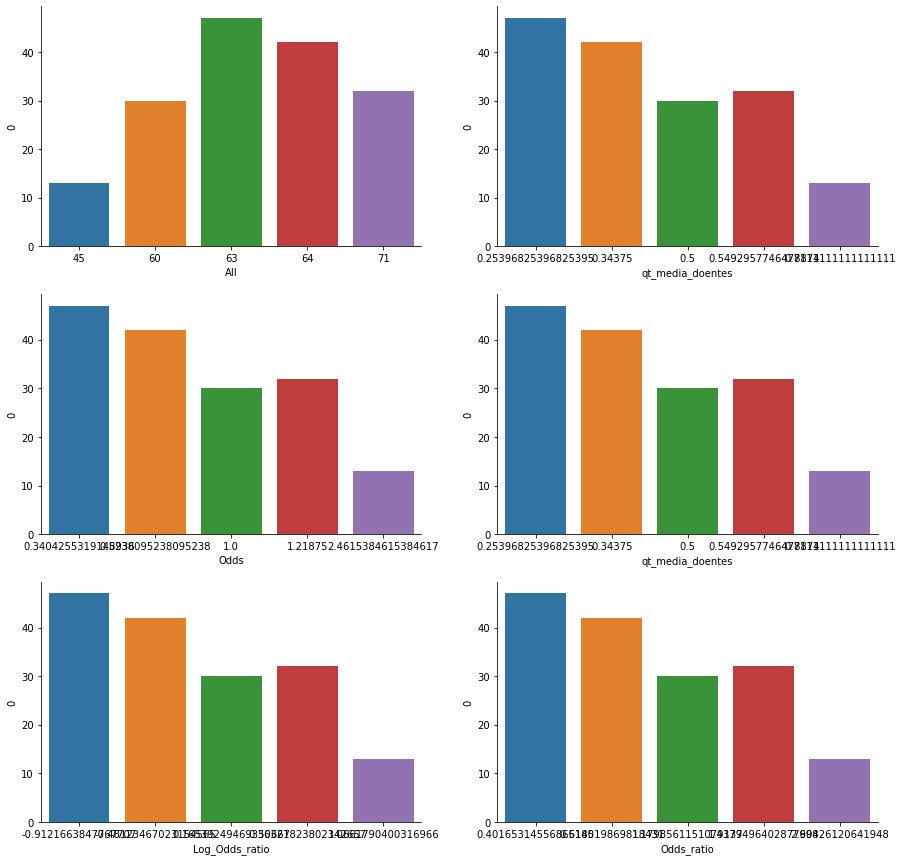

In [18]:
from matplotlib.ticker import EngFormatter
plt.close('all')
plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(3, 2)
fmt = EngFormatter(places=2)
sns.barplot(x='All', y=0, data = tab2[0:5], ax=axes[0,0])
sns.barplot(x='qt_media_doentes',y=0,data=tab2[0:5], ax=axes[0,1])
sns.barplot(x='Odds',y=0,data=tab2[0:5], ax=axes[1,0])
sns.barplot(x='qt_media_doentes',y=0,data=tab2[0:5], ax=axes[1,1])
# plt.plot(tab2[0:5]['Odds_ratio'], 'r')#, ax=axes[2,1])
# plt.plot(tab2[0:5]['Log_Odds_ratio'], 'r')#, ax=axes[2,1])
sns.barplot(x='Odds_ratio',y=0,data=tab2[0:5], ax=axes[2,1])
sns.barplot(x='Log_Odds_ratio',y=0,data=tab2[0:5], ax=axes[2,0])


# plt.xticks(rotation=45)
sns.despine()
